<a href="https://colab.research.google.com/github/shailavij/ML-Projects/blob/master/Wind_power_forecast_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('/content/Turbine_Data.csv')
df.head(5)

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [4]:
df_updated= df.copy()
df_updated['Unnamed: 0']=pd.to_datetime(df_updated['Unnamed: 0'])
df_updated.rename(columns={'Unnamed: 0':'Date'},inplace=True)
df_updated.head(2)

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [5]:
df_updated['Date']=pd.to_datetime(df_updated['Date'])

In [6]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Date                          118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

In [7]:
df_updated.head()

,Date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [8]:
df2=df_updated[['Date','ActivePower']]
df2.head(4)

,Date,ActivePower
0,2017-12-31 00:00:00+00:00,NaN
1,2017-12-31 00:10:00+00:00,NaN
2,2017-12-31 00:20:00+00:00,NaN
3,2017-12-31 00:30:00+00:00,NaN


In [9]:
df2.shape

(118224, 2)

In [10]:
df2.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
df2.isnull().sum()

Date           0
ActivePower    0
dtype: int64

In [12]:
df2.head(3)

,Date,ActivePower
144,2018-01-01 00:00:00+00:00,-5.357727
145,2018-01-01 00:10:00+00:00,-5.822360
146,2018-01-01 00:20:00+00:00,-5.279409


In [13]:
#Resample given data into Hourly basis
df2.set_index(['Date'], inplace=True)
df3=df2.resample("D").mean()
df3.shape

(820, 1)

In [14]:
df3.head(3)

,ActivePower
Date,
2018-01-01 00:00:00+00:00,190.815478
2018-01-02 00:00:00+00:00,339.470285
2018-01-03 00:00:00+00:00,317.517653


In [15]:
df3.reset_index(inplace=True)
df3

,Date,ActivePower
0,2018-01-01 00:00:00+00:00,190.815478
1,2018-01-02 00:00:00+00:00,339.470285
2,2018-01-03 00:00:00+00:00,317.517653
3,2018-01-04 00:00:00+00:00,361.856700
4,2018-01-05 00:00:00+00:00,236.783611
...,...,...
815,2020-03-26 00:00:00+00:00,644.979144
816,2020-03-27 00:00:00+00:00,718.695340
817,2020-03-28 00:00:00+00:00,666.476157
818,2020-03-29 00:00:00+00:00,793.461992


In [16]:
df3['Date1'] = pd.to_datetime(df3['Date']).dt.date
df3['Date1']=pd.to_datetime(df3['Date1'])

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         820 non-null    datetime64[ns, UTC]
 1   ActivePower  751 non-null    float64            
 2   Date1        820 non-null    datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1)
memory usage: 19.3 KB


In [18]:
fig = px.line(df3, x='Date1', y='ActivePower', title='Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20622a37d0>,
      dtype=object)

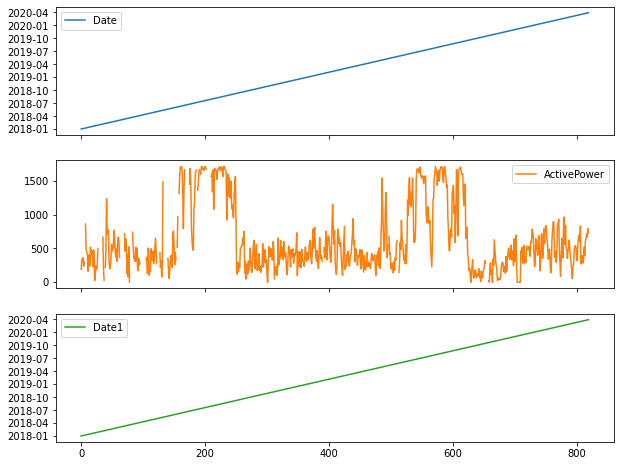

In [19]:
df3.plot(subplots=True)

Prophet Paper - https://peerj.com/preprints/3190/

y(t)= g(t) + s(t) + h(t) + εt

In [20]:
from prophet import Prophet

In [21]:
df_final=df3.reset_index()[['Date1','ActivePower']].rename({'Date1':'ds','ActivePower':'y'}, axis='columns')

In [22]:
df_final

,ds,y
0,2018-01-01,190.815478
1,2018-01-02,339.470285
2,2018-01-03,317.517653
3,2018-01-04,361.856700
4,2018-01-05,236.783611
...,...,...
815,2020-03-26,644.979144
816,2020-03-27,718.695340
817,2020-03-28,666.476157
818,2020-03-29,793.461992


In [23]:
train=df_final[(df_final['ds'] > '2018-01-01') & (df_final['ds'] <= '2019-12-31')]
test=df_final[(df_final['ds'] >= '2020-01-01')]

In [24]:
train.shape

(729, 2)

In [25]:
test.shape

(90, 2)

In [44]:
test.tail(5)

,ds,y
815,2020-03-26,644.979144
816,2020-03-27,718.695340
817,2020-03-28,666.476157
818,2020-03-29,793.461992
819,2020-03-30,733.101238


In [27]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [28]:
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8d_zxpd/wa70ayjq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8d_zxpd/27m6l6h_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85131', 'data', 'file=/tmp/tmpa8d_zxpd/wa70ayjq.json', 'init=/tmp/tmpa8d_zxpd/27m6l6h_.json', 'output', 'file=/tmp/tmpa8d_zxpd/prophet_modelsd45fhp8/prophet_model-20221125052203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.params

In [50]:
future = m.make_future_dataframe(periods=120)
future.tail(10)

,ds
839,2020-04-20
840,2020-04-21
841,2020-04-22
842,2020-04-23
843,2020-04-24
844,2020-04-25
845,2020-04-26
846,2020-04-27
847,2020-04-28
848,2020-04-29


In [51]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
844,2020-04-25,390.530579,-120.687177,916.755535
845,2020-04-26,415.840889,-96.763183,940.559607
846,2020-04-27,437.748613,-49.664892,944.560201
847,2020-04-28,454.865799,-6.162976,1009.278589
848,2020-04-29,489.622886,-13.126121,997.375591


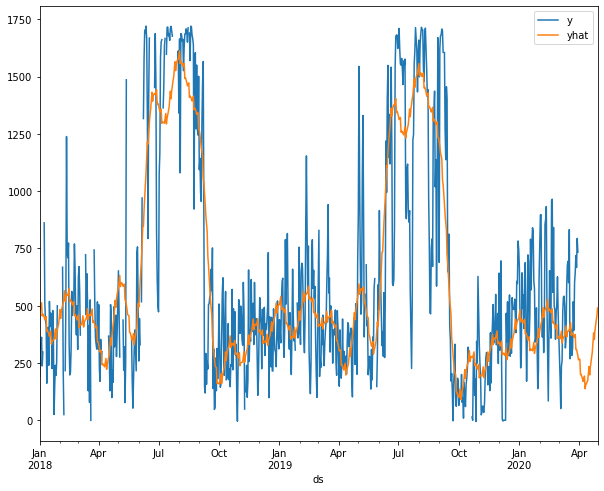

In [52]:
pd.concat([df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

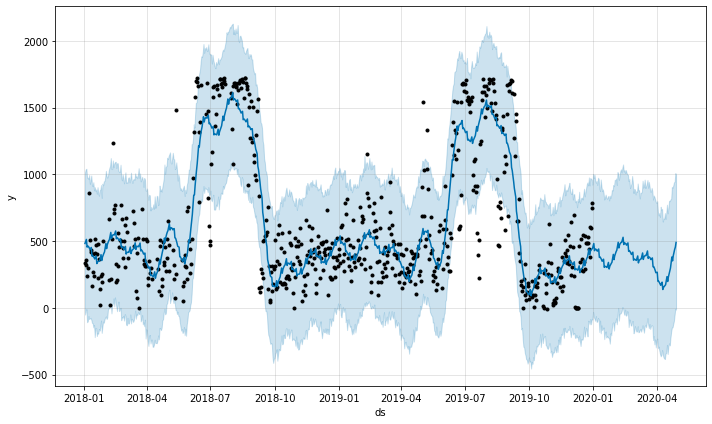

In [53]:
fig1 = m.plot(forecast)

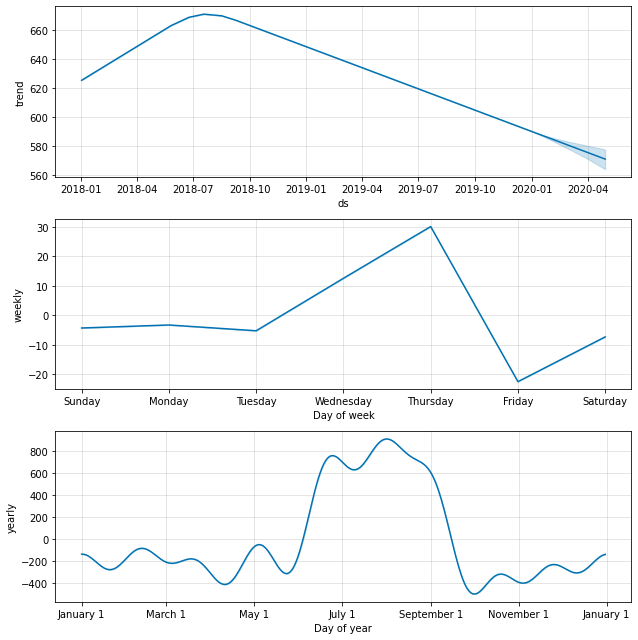

In [54]:
fig2 = m.plot_components(forecast)

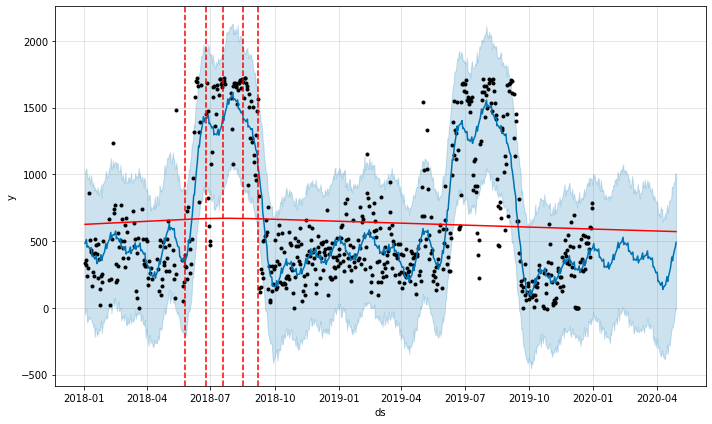

In [55]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [59]:
deltas = m.params['delta'].mean(0)
deltas

array([-1.30945e-08,  5.18396e-09, -1.98932e-09, -3.84627e-09,
       -2.69447e-02, -4.55110e-02, -5.47993e-02, -3.93537e-02,
       -1.14878e-02, -1.13505e-06, -1.95800e-04, -6.67771e-07,
       -1.11502e-04, -3.99282e-08, -1.47134e-07, -1.23943e-09,
       -9.15888e-09, -3.12215e-08, -1.17796e-09, -2.73268e-09,
        6.90736e-09, -1.22000e-08, -3.73990e-09, -2.78040e-10,
       -6.63746e-09])

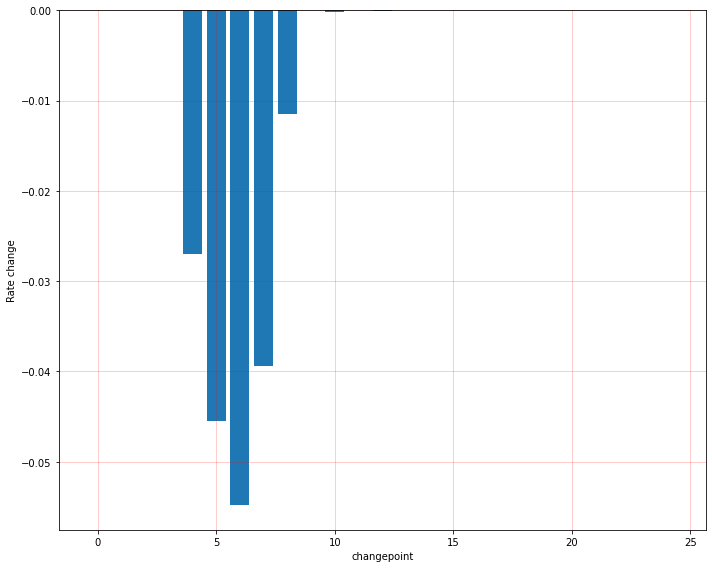

In [60]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [61]:
m.changepoints

21    2018-01-24
42    2018-02-22
63    2018-03-26
84    2018-04-24
105   2018-05-26
126   2018-06-25
148   2018-07-19
169   2018-08-17
190   2018-09-07
211   2018-09-28
232   2018-10-19
253   2018-11-09
274   2018-12-01
295   2018-12-22
316   2019-01-12
337   2019-02-04
358   2019-02-25
379   2019-03-18
401   2019-04-09
422   2019-04-30
443   2019-05-22
464   2019-06-14
485   2019-07-05
506   2019-07-26
527   2019-08-16
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8d_zxpd/xgs9fcey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8d_zxpd/039hbrwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63855', 'data', 'file=/tmp/tmpa8d_zxpd/xgs9fcey.json', 'init=/tmp/tmpa8d_zxpd/039hbrwk.json', 'output', 'file=/tmp/tmpa8d_zxpd/prophet_modelaxddv4mg/prophet_model-20221125053147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


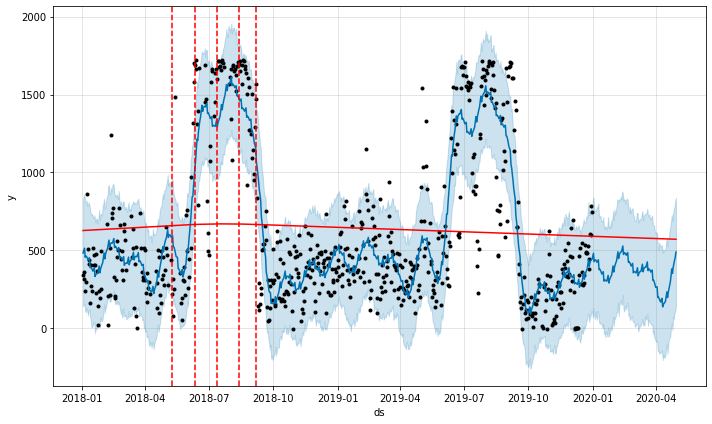

In [62]:
pro_change= Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [63]:
from prophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [79]:
from prophet.diagnostics import cross_validation
#cv_results = cross_validation(model = m, initial='729 days', period='30 days', horizon = '150 days')
cv_results=cross_validation(m, initial = '365 days', period = '300 days', horizon = '300 days') 



INFO:prophet:Making 1 forecasts with cutoffs between 2019-03-06 00:00:00 and 2019-03-06 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8d_zxpd/rop9p3eq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8d_zxpd/rk5bvjgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68046', 'data', 'file=/tmp/tmpa8d_zxpd/rop9p3eq.json', 'init=/tmp/tmpa8d_zxpd/rk5bvjgi.json', 'output', 'file=/tmp/tmpa8d_zxpd/prophet_modelk95no0qd/prophet_model-20221125054029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
cv_results.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-03-07,408.145305,-42.625427,861.135598,329.607957,2019-03-06
1,2019-03-08,330.224216,-113.194721,784.631257,458.633933,2019-03-06
2,2019-03-09,371.027814,-28.697091,814.764204,296.197381,2019-03-06
3,2019-03-10,424.597690,5.646991,867.665605,237.568060,2019-03-06
4,2019-03-11,423.393373,5.584651,843.217098,339.742721,2019-03-06


In [75]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,29 days,31462.966525,177.378033,139.036136,0.252637,0.332635,0.965517
1,30 days,31477.070406,177.417785,139.124486,0.279983,0.337779,0.965517
2,31 days,30936.252091,175.887044,135.675124,0.252637,0.330267,0.965517
3,32 days,31408.859262,177.225448,137.885908,0.310166,0.335408,0.965517
4,33 days,30269.484305,173.981276,132.954717,0.246218,0.321985,0.965517
...,...,...,...,...,...,...,...
259,296 days,57481.374969,239.752737,178.360462,0.289147,0.609339,0.827586
260,297 days,58425.207406,241.713068,182.060609,0.297354,0.615528,0.827586
261,298 days,57685.914736,240.178922,179.628676,0.289147,0.604077,0.827586
262,299 days,60055.687386,245.062619,184.786459,0.297354,0.611281,0.827586


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



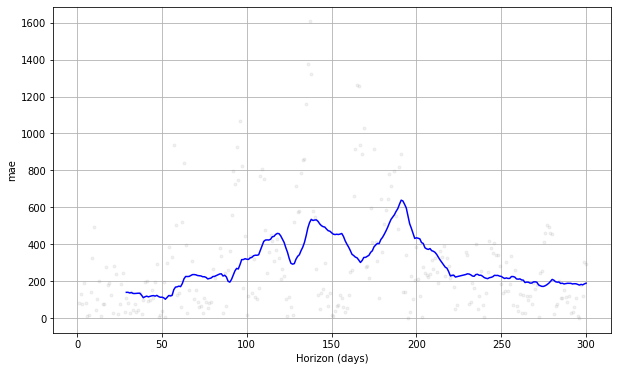

In [85]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='mae')
